In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [16]:
#Importing the arrays from the tempo.lis files, starting with factor64, this is fully time scrunched

#By default np.genfromtxt brings in consecutive white spaces as delimiters!
#col1=time, col2=frequency, col3=prefitresids
arrays_factor64 = np.genfromtxt('tempo_factor64.lis', skip_header=90, max_rows=1055, usecols=(1,4,7))

print arrays_factor64

TOA_64 = arrays_factor64[:,0] 
freq_64 = arrays_factor64[:,1]
resid_64 = arrays_factor64[:,2]

[[  5.59894415e+04   1.71679300e+03   0.00000000e+00]
 [  5.59894415e+04   1.63268000e+03  -0.00000000e+00]
 [  5.59894415e+04   1.52961900e+03  -0.00000000e+00]
 ..., 
 [  5.73876619e+04   2.07526000e+03   2.00000000e-03]
 [  5.73876619e+04   1.85497900e+03   2.00000000e-03]
 [  5.73876619e+04   1.80099100e+03   2.00000000e-03]]


In [30]:
#Define the colormap

from matplotlib.colors import LinearSegmentedColormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap=LinearSegmentedColormap.from_list('name', colors, 8)

#setting tick numbers for the colorbar too
from matplotlib import ticker

tick_locator = ticker.MaxNLocator(nbins=9)

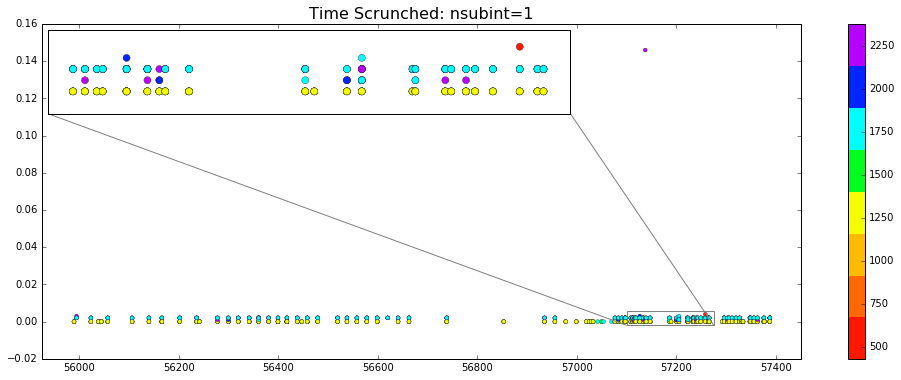

In [31]:
#Plot residual vs. MJD. (Time Scrunched to 1 subinterval)

#Create the plot and the adjoined color bar
fig,ax = plt.subplots(figsize=(17,6))
cax = ax.scatter(TOA_64, resid_64, c=freq_64, s=15, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('Time Scrunched: nsubint=1', fontsize='16')
ax.set_xlim(55925, 57450)
cb = fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

#Creating the zoomed portion of the plot
axins = zoomed_inset_axes(ax, 6, loc=2) # zoom-factor: 2.5, location: upper-left
axins.scatter(TOA_64, resid_64, c=freq_64, s=50, edgecolor='#262626', linewidth='0.35', cmap=cmap)
x1, x2, y1, y2 = 57100, 57275, -0.002, 0.0055 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.tick_params(axis='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5") #Draw the lines to the plot

plt.show()

In [125]:
#Importing arrays for factor2, has been partially scrunched so there are half the original time bins

arrays_factor2 = np.genfromtxt('tempo_factor2.lis', skip_header=90, max_rows=8870, usecols=(1,4,7))

print arrays_factor2

TOA_2 = arrays_factor2[:,0] 
freq_2 = arrays_factor2[:,1]
resid_2 = arrays_factor2[:,2]

[[  5.59894339e+04   1.71749900e+03   0.00000000e+00]
 [  5.59894339e+04   1.63269400e+03  -0.00000000e+00]
 [  5.59894339e+04   1.52928400e+03  -0.00000000e+00]
 ..., 
 [  5.73876705e+04   2.07568400e+03   2.00000000e-03]
 [  5.73876705e+04   1.85499900e+03   2.00000000e-03]
 [  5.73876705e+04   1.80109300e+03   1.00000000e-03]]


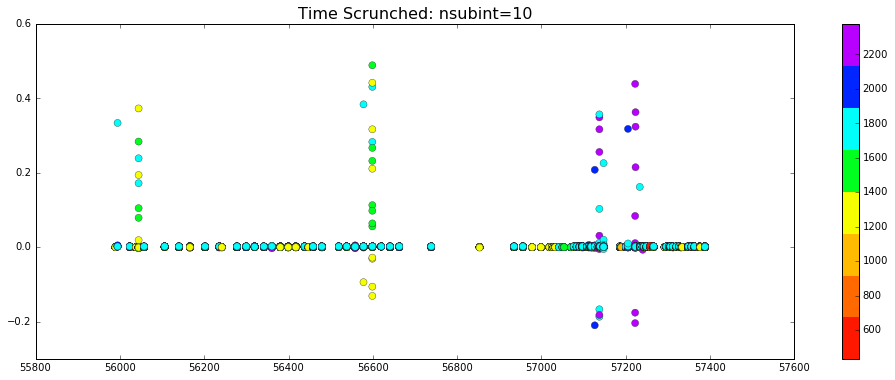

In [126]:
#Plot residual vs. MJD. (Time Scrunched in half to 10 subintervals)

fig,ax = plt.subplots(figsize=(17,6))
cax = ax.scatter(TOA_2, resid_2, c=freq_2, s=50, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('Time Scrunched: nsubint=10', fontsize='16')
fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

plt.show()

In [3]:
#Importing arrays for nots, no time scrunching so original number of time bins

arrays_nots = np.genfromtxt('tempo_nots.lis', skip_header=90, max_rows=17109, usecols=(1,4,7))

print arrays_nots

TOA_nots = arrays_nots[:,0] 
freq_nots = arrays_nots[:,1]
resid_nots = arrays_nots[:,2]

[[  5.59894335e+04   1.71749900e+03   0.00000000e+00]
 [  5.59894335e+04   1.63269400e+03  -0.00000000e+00]
 [  5.59894335e+04   1.52915000e+03  -0.00000000e+00]
 ..., 
 [  5.73876705e+04   2.07568400e+03   2.00000000e-03]
 [  5.73876705e+04   1.85499900e+03   2.00000000e-03]
 [  5.73876705e+04   1.80109300e+03   1.00000000e-03]]


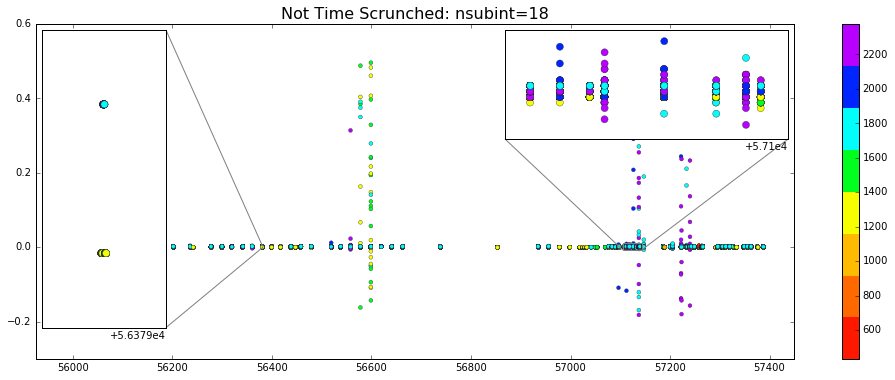

In [128]:
#Plot residual vs. MJD. (Time Scrunched in half to 10 subintervals)

# cmap = plt.get_cmap('gist_rainbow', 8)

fig,ax = plt.subplots(figsize=(17,6))
cax = ax.scatter(TOA_nots, resid_nots, c=freq_nots, s=15, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('Not Time Scrunched: nsubint=18', fontsize='16')
ax.set_xlim(55925, 57450)
fig.colorbar(cax)

#Creating the zoomed portion of the plot on the upper right
axins = zoomed_inset_axes(ax, 15, loc=1) # zoom-factor: 2.5, location: upper-left
axins.scatter(TOA_nots, resid_nots, c=freq_nots, s=50, edgecolor='#262626', linewidth='0.35', cmap=cmap)
x1, x2, y1, y2 = 57105, 57143, -0.0075, 0.012 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.tick_params(axis='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')

mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5") #Draw the lines to the plot

#Creating the zoomed portion of the plot on the upper left
axins2 = zoomed_inset_axes(ax, 200, loc=2) # zoom-factor: 2.5, location: upper-left
axins2.scatter(TOA_nots, resid_nots, c=freq_nots, s=50, edgecolor='#262626', linewidth='0.35', cmap=cmap)
x1b, x2b, y1b, y2b = 56379.75, 56381, -0.001, 0.003 # specify the limits
axins2.set_xlim(x1b, x2b) # apply the x-limits
axins2.set_ylim(y1b, y2b) # apply the y-limits
plt.tick_params(axis='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')

mark_inset(ax, axins2, loc1=1, loc2=4, fc="none", ec="0.5") #Draw the lines to the plot

plt.show()

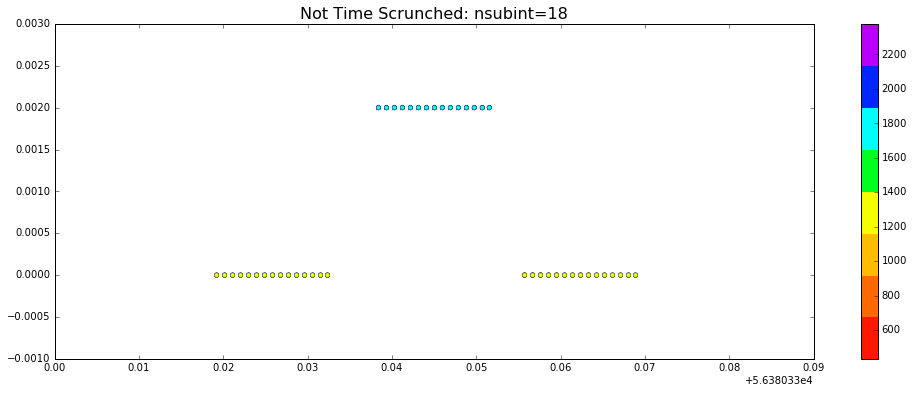

In [123]:
#Now looking closer at MJD 56380, will repeat this with the other residuals file below, I think it might be more accurate

fig,ax = plt.subplots(figsize=(17,6))
cax = ax.scatter(TOA_nots, resid_nots, c=freq_nots, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('Not Time Scrunched: nsubint=18', fontsize='16')
ax.set_xlim(56380.33, 56380.42)
ax.set_ylim(-0.001, 0.003)
fig.colorbar(cax)

plt.show()

In [32]:
###########################################
###########################################
#Switching over to resid2.tmp files
#Creating sublplots for L-band (1-2 GHz), S-band (2-4 GHz), and 430 MHz band (0.3-1 GHz)

In [69]:
import residuals as r

#Define the colormap

from matplotlib.colors import LinearSegmentedColormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap=LinearSegmentedColormap.from_list('name', colors, 8)

#setting tick numbers for the colorbar too
from matplotlib import ticker

tick_locator = ticker.MaxNLocator(nbins=9)

In [70]:
print x.bary_freq

[ 1717.35115231  1632.55340073  1529.15239196 ...,  2075.61511975
  1854.93739276  1801.03317873]


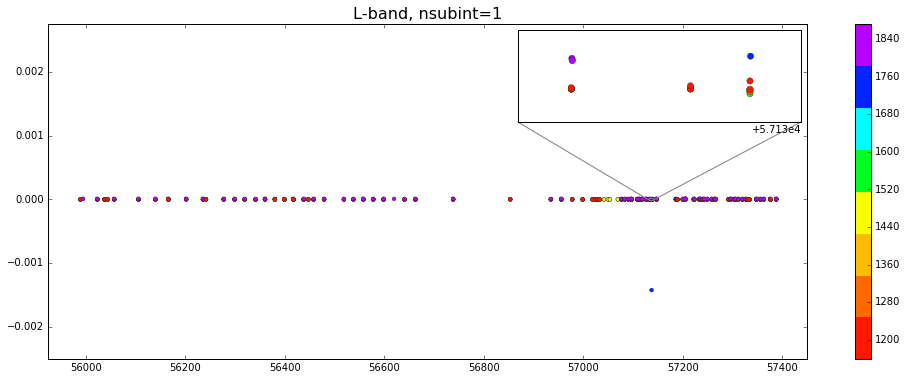

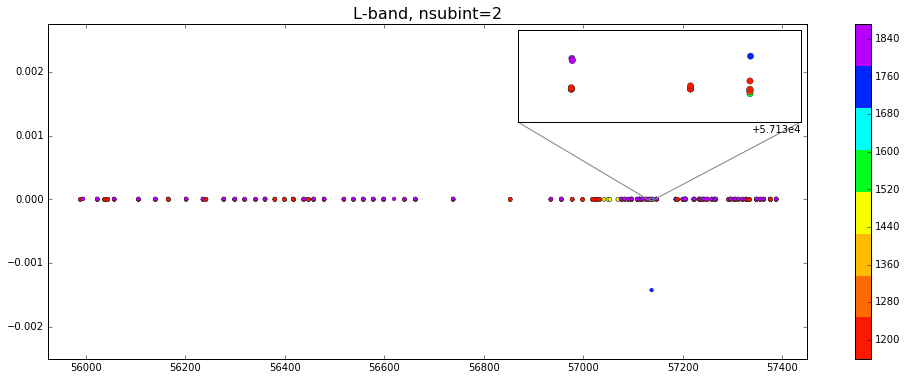

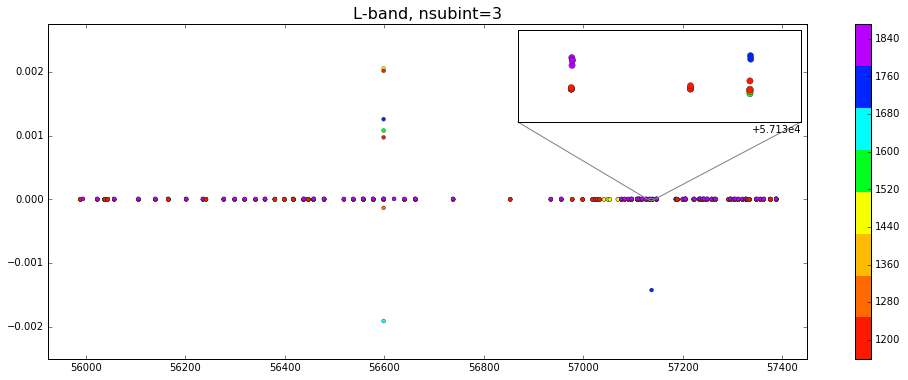

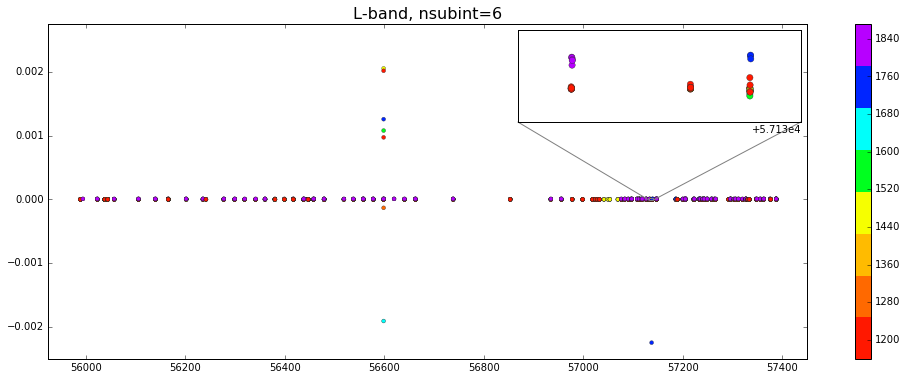

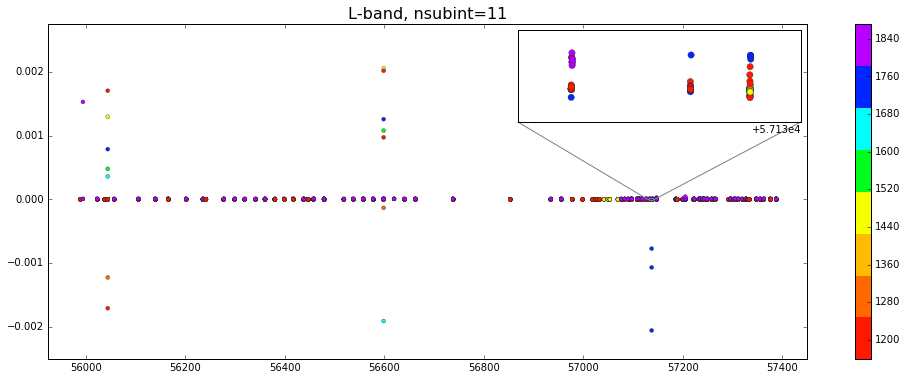

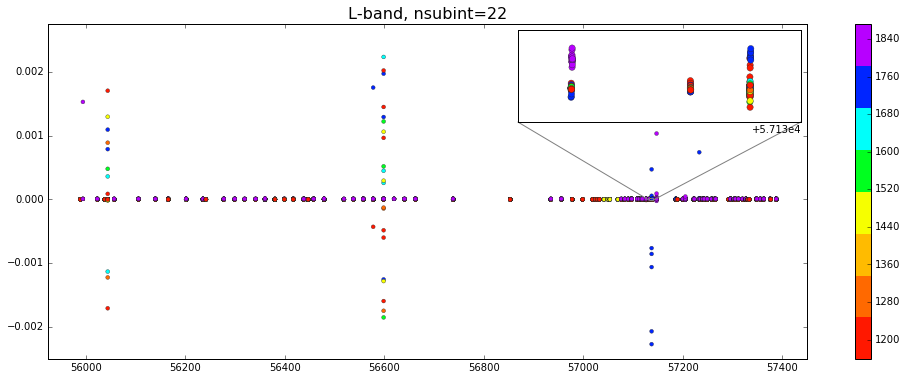

In [96]:
#Here's the L-band plot
names = ["L-band, nsubint=1", "L-band, nsubint=2", "L-band, nsubint=3", "L-band, nsubint=6", 
         "L-band, nsubint=11", "L-band, nsubint=22"]
factors = [64, 32, 16, 8, 4, 2]

#L band plots
for i, j in zip(names, factors): 
    x=r.read_residuals(filename="resid2_factor" + str(j) + ".tmp")
    fig,ax = plt.subplots(figsize=(17,6))
    cax = ax.scatter(x.bary_TOA[(x.bary_freq > 1000.00) & (x.bary_freq < 2000.00)],
                     x.prefit_sec[(x.bary_freq > 1000.00) & (x.bary_freq < 2000.00)], 
                     c=x.bary_freq[(x.bary_freq > 1000.00) & (x.bary_freq < 2000.00)],
                     s=15, edgecolor='#262626', linewidth='0.35', cmap=cmap)
    ax.set_title(i, fontsize='16')
    ax.set_xlim(55925, 57450)
    ax.set_ylim(-0.0025, 0.00275)
    fig.colorbar(cax)
    cb.locator = tick_locator
    cb.update_ticks()
    
    axins = zoomed_inset_axes(ax, 60, loc=1)
    axins.scatter(x.bary_TOA[(x.bary_freq > 1000.00) & (x.bary_freq < 2000.00)],
                  x.prefit_sec[(x.bary_freq > 1000.00) & (x.bary_freq < 2000.00)], 
                  c=x.bary_freq[(x.bary_freq > 1000.00) & (x.bary_freq < 2000.00)], 
                  s=40, edgecolor='#262626', linewidth='0.35', cmap=cmap)
    x1, x2, y1, y2 = 57131.5, 57141, -0.000009, 0.000015
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    plt.tick_params(axis='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5") 

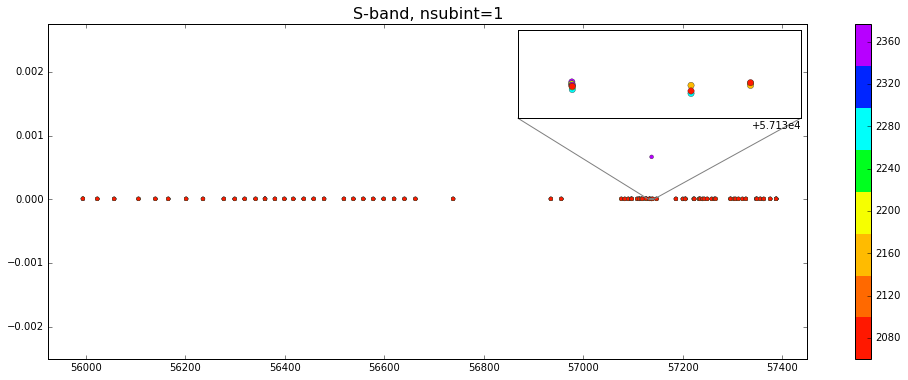

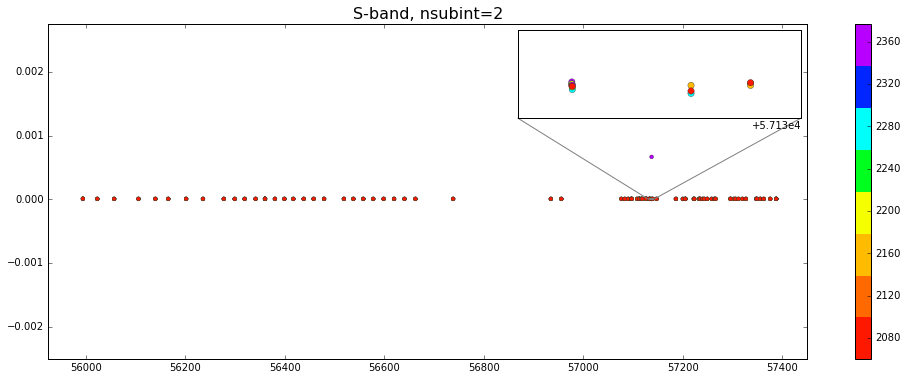

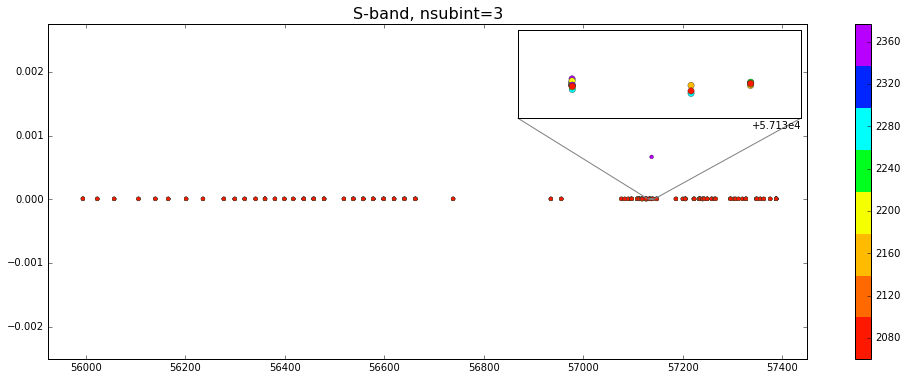

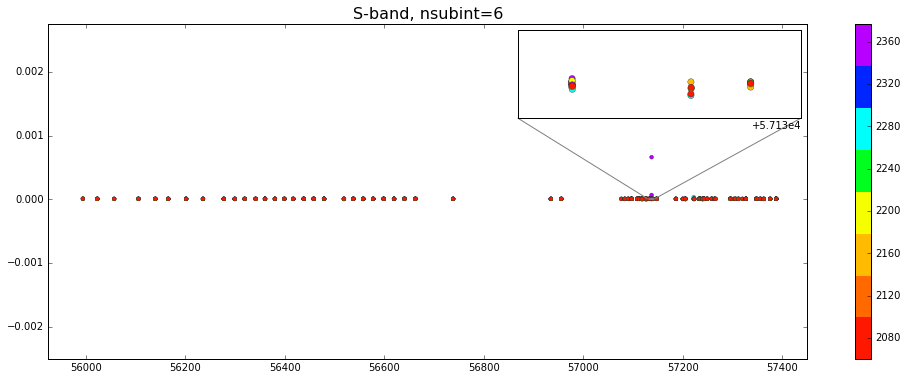

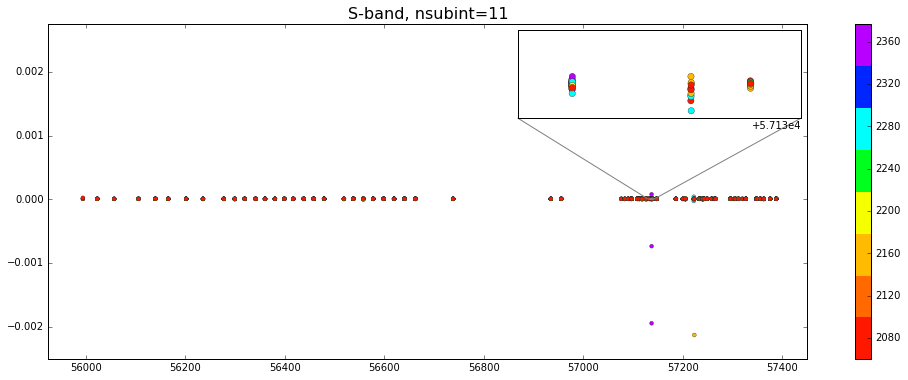

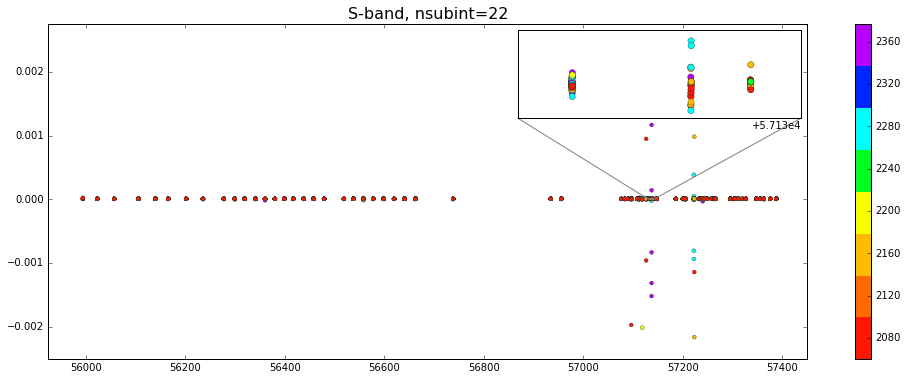

In [101]:
#Here's the S-band plot
names = ["S-band, nsubint=1", "S-band, nsubint=2", "S-band, nsubint=3", "S-band, nsubint=6", 
         "S-band, nsubint=11", "S-band, nsubint=22"]
factors = [64, 32, 16, 8, 4, 2]

#L band plots
for i, j in zip(names, factors): 
    x=r.read_residuals(filename="resid2_factor" + str(j) + ".tmp")
    fig,ax = plt.subplots(figsize=(17,6))
    cax = ax.scatter(x.bary_TOA[(x.bary_freq > 2000.00) & (x.bary_freq < 4000.00)],
                     x.prefit_sec[(x.bary_freq > 2000.00) & (x.bary_freq < 4000.00)], 
                     c=x.bary_freq[(x.bary_freq > 2000.00) & (x.bary_freq < 4000.00)],
                     s=15, edgecolor='#262626', linewidth='0.35', cmap=cmap)
    ax.set_title(i, fontsize='16')
    ax.set_xlim(55925, 57450)
    ax.set_ylim(-0.0025, 0.00275)
    fig.colorbar(cax)
    cb.locator = tick_locator
    cb.update_ticks()
    
    axins = zoomed_inset_axes(ax, 60, loc=1)
    axins.scatter(x.bary_TOA[(x.bary_freq > 2000.00) & (x.bary_freq < 4000.00)],
                  x.prefit_sec[(x.bary_freq > 2000.00) & (x.bary_freq < 4000.00)], 
                  c=x.bary_freq[(x.bary_freq > 2000.00) & (x.bary_freq < 4000.00)], 
                  s=40, edgecolor='#262626', linewidth='0.35', cmap=cmap)
    x1, x2, y1, y2 = 57131.5, 57141, -0.000001, 0.000022
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    plt.tick_params(axis='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5") 

In [99]:
#Here's the 430MHz-band plot. There's only two TOAs that this actually applies to.
names = ["430MHz-band, nsubint=1", "430MHz-band, nsubint=2", "430MHz-band, nsubint=3", "430MHz-band, nsubint=6", 
         "430MHz-band, nsubint=11", "430MHz-band, nsubint=22"]
factors = [64, 32, 16, 8, 4, 2]

#430 MHz plots
for i, j in zip(names, factors):
    x=r.read_residuals(filename="resid2_factor" + str(j) + ".tmp")
    fig,ax = plt.subplots(figsize=(17,6))
    cax = ax.scatter(x.bary_TOA[(x.bary_freq > 300.00) & (x.bary_freq < 1000.00)],
                     x.prefit_sec[(x.bary_freq > 300.00) & (x.bary_freq < 1000.00)], 
                     c=x.bary_freq[(x.bary_freq > 300.00) & (x.bary_freq < 1000.00)],
                     s=15, edgecolor='#262626', linewidth='0.35', cmap=cmap)
    ax.set_title(i, fontsize='16')
    ax.set_xlim(55925, 57450)
    ax.set_ylim(-0.0025, 0.00275)
    fig.colorbar(cax)
    cb.locator = tick_locator
    cb.update_ticks()
    
    axins = zoomed_inset_axes(ax, 60, loc=1)
    axins.scatter(x.bary_TOA[(x.bary_freq > 300.00) & (x.bary_freq < 1000.00)],
                  x.prefit_sec[(x.bary_freq > 300.00) & (x.bary_freq < 1000.00)], 
                  c=x.bary_freq[(x.bary_freq > 300.00) & (x.bary_freq < 1000.00)], 
                  s=40, edgecolor='#262626', linewidth='0.35', cmap=cmap)
    x1, x2, y1, y2 = 57131.5, 57141, -0.000001, 0.000022
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    plt.tick_params(axis='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

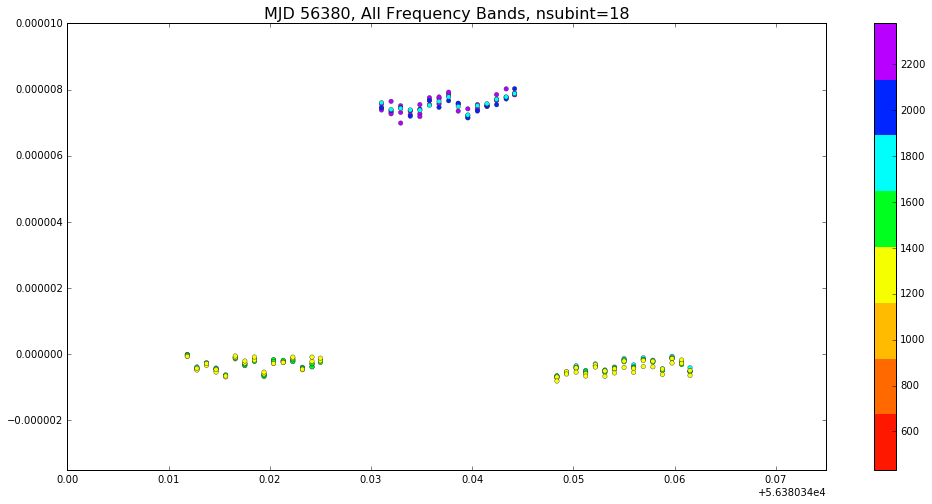

In [144]:
x=r.read_residuals(filename="resid2_nots.tmp")

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA, x.prefit_sec, c=x.bary_freq, s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, All Frequency Bands, nsubint=18', fontsize='16')
ax.set_xlim(56380.34, 56380.415)
ax.set_ylim(-0.0000035, 0.00001)
fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

plt.show()

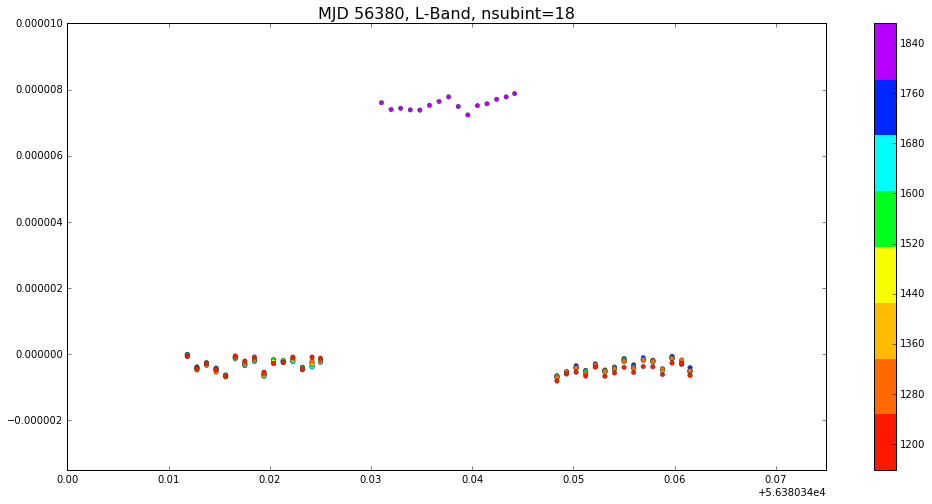

In [149]:
#This plot uses the L-band
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[(x.bary_freq > 1000.00) & (x.bary_freq < 2000.00)], 
                 x.prefit_sec[(x.bary_freq > 1000.00) & (x.bary_freq < 2000.00)], 
                 c=x.bary_freq[(x.bary_freq > 1000.00) & (x.bary_freq < 2000.00)], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, L-Band, nsubint=18', fontsize='16')
ax.set_xlim(56380.34, 56380.415)
ax.set_ylim(-0.0000035, 0.00001)
fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

plt.show()

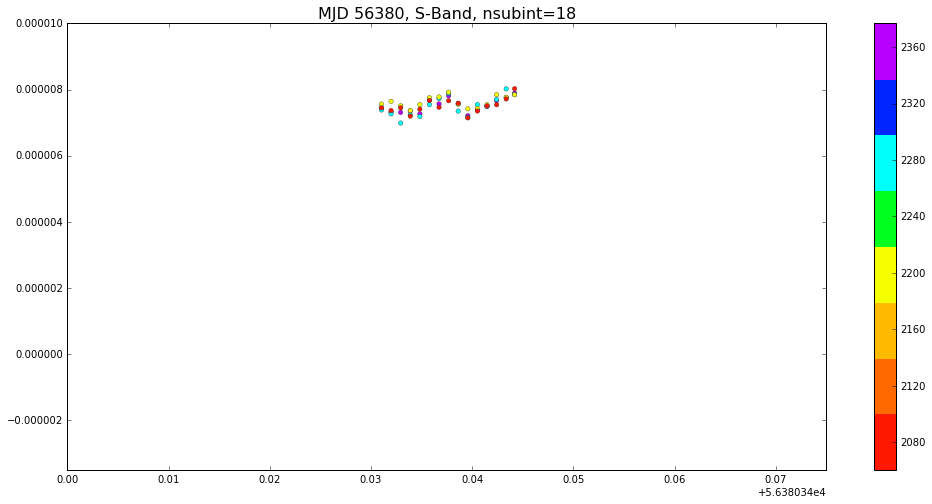

In [146]:
#This plot uses the S-band
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[(x.bary_freq > 2000.00) & (x.bary_freq < 4000.00)], 
                 x.prefit_sec[(x.bary_freq > 2000.00) & (x.bary_freq < 4000.00)], 
                 c=x.bary_freq[(x.bary_freq > 2000.00) & (x.bary_freq < 4000.00)], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, S-Band, nsubint=18', fontsize='16')
ax.set_xlim(56380.34, 56380.415)
ax.set_ylim(-0.0000035, 0.00001)
fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

plt.show()

In [152]:
#This plot uses the 430MHz-band (there is no data at this frequency on this day)
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[(x.bary_freq > 300.00) & (x.bary_freq < 1000.00)], 
                 x.prefit_sec[(x.bary_freq > 300.00) & (x.bary_freq < 1000.00)], 
                 c=x.bary_freq[(x.bary_freq > 300.00) & (x.bary_freq < 1000.00)], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, 430 MHZ-band, nsubint=18', fontsize='16')
ax.set_xlim(56380.34, 56380.415)
ax.set_ylim(-0.0000035, 0.00001)
fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

plt.show()

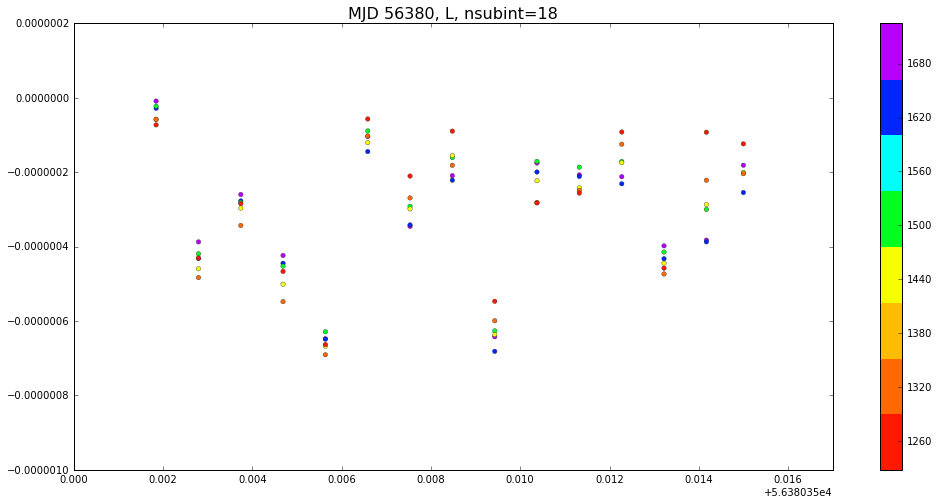

In [223]:
#Now imitating Michael's plots with the lines, looks like he's focusing on the bottom left TOA batch.
#Turns out when using all frequency bands, this section is entirely within the L-band.

#This plot uses all frequency bands
fig,ax = plt.subplots(figsize=(17,8))
cax = ax.scatter(x.bary_TOA[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)], 
                 x.prefit_sec[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)], 
                 c=x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)], 
                 s=20, edgecolor='#262626', linewidth='0.35', cmap=cmap)
ax.set_title('MJD 56380, L, nsubint=18', fontsize='16')
ax.set_xlim(56380.35, 56380.367)
ax.set_ylim(-0.000001, 0.0000002)
fig.colorbar(cax)
cb.locator = tick_locator
cb.update_ticks()

plt.show()

In [178]:
print max(x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)])
print min(x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)])

1724.86091508
1227.73058646


In [179]:
1725-1227

498

In [214]:
498/8
498/6

83

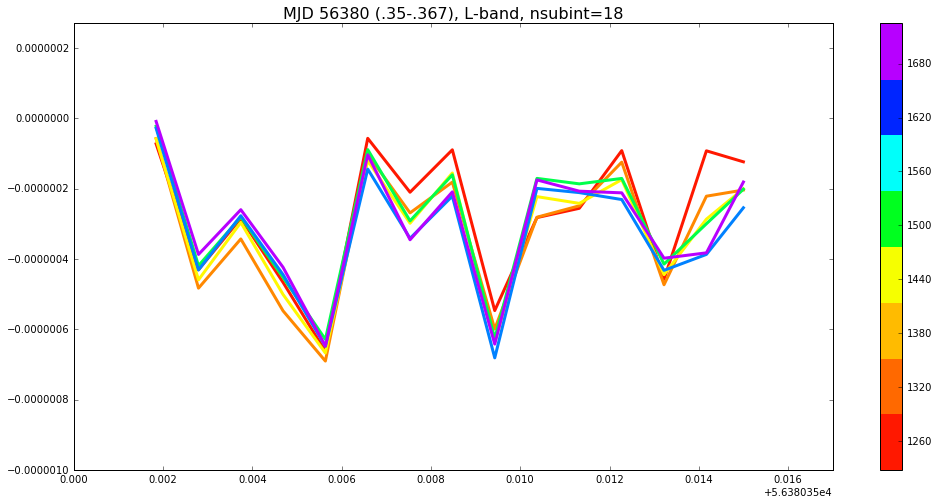

In [254]:
#Create a plot that goes up by increments of 62 and then plots each line as a different color.
#This uses the same section as the Lam plot


#Define the colormap

interval=np.hstack([np.linspace(0.05, 0.25), np.linspace(0.35,0.9)])
colors=plt.cm.gist_rainbow(interval)
cmap_lines=LinearSegmentedColormap.from_list('name', colors, 6)

#setting tick numbers for the colorbar too
tick_locator_lines = ticker.MaxNLocator(nbins=7)


TOA=x.bary_TOA[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)]
Resid=x.prefit_sec[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)]
Freq=x.bary_freq[(x.bary_TOA > 56380.35) & (x.bary_TOA < 56380.367)]

n = 1227
m = 1310
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,6):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380 (.35-.367), L-band, nsubint=18', fontsize='16')
    ax.set_xlim(56380.35, 56380.367)
    ax.set_ylim(-0.000001, 0.00000027)
    n=n+83
    m=m+83
fig.colorbar(cax)
plt.show()

#need to fix the colorbar - right now it's calling the plot above (8-color)

In [234]:
print max(x.bary_freq[(x.bary_TOA > 56380.370) & (x.bary_TOA < 56380.387)])
print min(x.bary_freq[(x.bary_TOA > 56380.370) & (x.bary_TOA < 56380.387)])

2366.28393704
1856.15256185


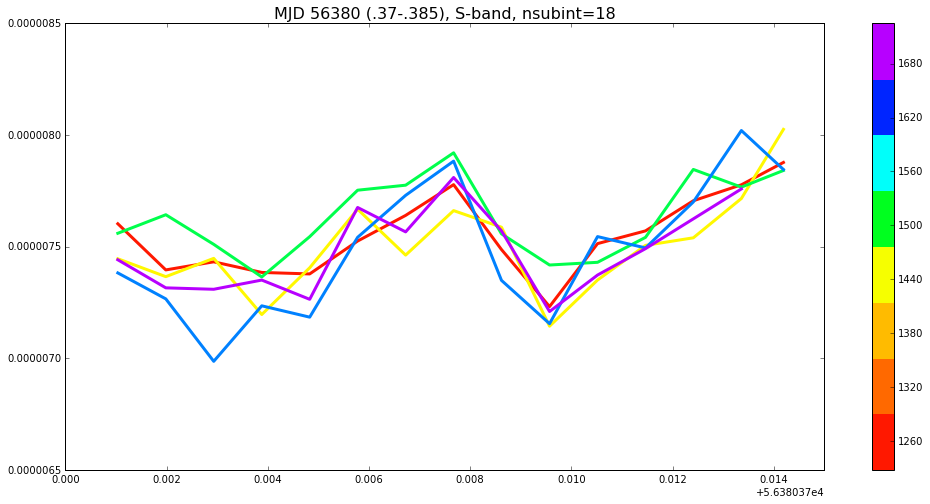

In [242]:
#Same MJD as Lam paper, but next section of observations

TOA=x.bary_TOA[(x.bary_TOA > 56380.370) & (x.bary_TOA < 56380.387)]
Resid=x.prefit_sec[(x.bary_TOA > 56380.37) & (x.bary_TOA < 56380.387)]
Freq=x.bary_freq[(x.bary_TOA > 56380.37) & (x.bary_TOA < 56380.387)]

n = 1856
m = 1941
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,6):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380 (.37-.385), S-band, nsubint=18', fontsize='16')
    ax.set_xlim(56380.37, 56380.385)
    ax.set_ylim(0.0000065, 0.0000085)
    n=n+85
    m=m+85
fig.colorbar(cax)
plt.show()

#This colorbar is incorrect!

In [243]:
print max(x.bary_freq[(x.bary_TOA > 56380.390) & (x.bary_TOA < 56380.407)])
print min(x.bary_freq[(x.bary_TOA > 56380.390) & (x.bary_TOA < 56380.407)])

1724.49851905
1226.83923815


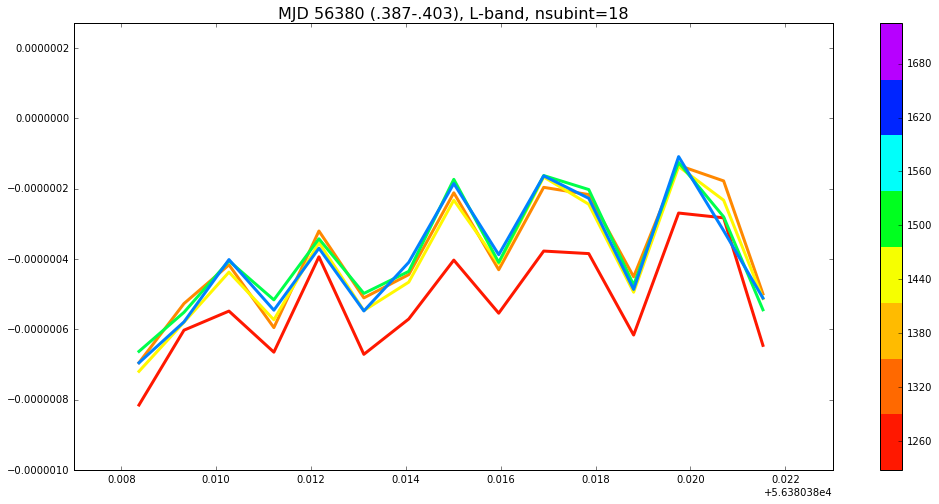

In [251]:
TOA=x.bary_TOA[(x.bary_TOA > 56380.387) & (x.bary_TOA < 56380.403)]
Resid=x.prefit_sec[(x.bary_TOA > 56380.387) & (x.bary_TOA < 56380.403)]
Freq=x.bary_freq[(x.bary_TOA > 56380.387) & (x.bary_TOA < 56380.403)]

n = 1226
m = 1309
fig,ax = plt.subplots(figsize=(17,8))


for i in range (0,5):
    ax.plot(TOA[(Freq > n) & (Freq < m)], 
                  Resid[(Freq > n) & (Freq < m)], color=cmap_lines(i), lw=3)
    ax.set_title('MJD 56380 (.387-.403), L-band, nsubint=18', fontsize='16')
    ax.set_xlim(56380.387, 56380.403)
    ax.set_ylim(-0.000001, 0.00000027)
    n=n+83
    m=m+83
fig.colorbar(cax)
plt.show()

1309

83